<a href="https://colab.research.google.com/github/hdspgroup/SeismicEnhancement/blob/main/C%C3%B3digoBase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Geological Modeling**

Open this notebook in Jupyter after doing the installation of gempy libraries

In [ ]:
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pyvista
import gempy_viewer as gpv
import gempy as plot_2d

In [ ]:
geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name='Modelo_1',
    extent=[0, 2000, 0, 2000, -1000, 0],
    resolution=[20, 20, 20],  # * Here we define the resolution of the voxels
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations= "OneDrive/Documentos/TESIS/Milee/X,Y,Z,azimuth,dip,polarity,formatio.txt",
        path_to_surface_points= "OneDrive/Documentos/TESIS/Milee/SURFACE_MILE2.txt",
    )
)

In [ ]:
geo_model.surface_points

X,Y,Z,id,nugget
600.00,1000.00,-10.00,75277111,0.00
700.00,1000.00,-200.00,75277111,0.00
800.00,1000.00,-400.00,75277111,0.00
1000.00,1000.00,-700.00,75277111,0.00
1200.00,1000.00,-1000.00,75277111,0.00
700.00,1200.00,-200.00,75277111,0.00
0.00,1200.00,-400.00,199001214,0.00
800.00,1200.00,-400.00,199001214,0.00
850.00,1200.00,-450.00,199001214,0.00
2000.00,1200.00,-450.00,199001214,0.00


In [ ]:
geo_model.orientations

X,Y,Z,G_x,G_y,G_z,id,nugget
500.00,1000.00,-300.00,0.87,0.00,0.50,75277111,0.01
400.00,1000.00,-400.00,0.00,0.00,1.00,199001214,0.01
1000.00,1000.00,-200.00,0.00,0.00,1.00,209940038,0.01


In [ ]:
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Main_Fault,
	color=#015482,
	is_active=True
),
Element(
	name=Sandstone_2,
	color=#9f0052,
	is_active=True
),
Element(
	name=Shale,
	color=#ffbe00,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [ ]:
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object=  # TODO: This mapping I do not like it too much. We should be able to do it passing the data objects directly
    {
        "Fault_Series": 'Main_Fault',
        "Strat_Series": ('Shale', 'Sandstone_2')
    }
)

geo_model.structural_frame  # Display the resulting structural frame

# %%
gp.set_is_fault(
    frame=geo_model.structural_frame,
    fault_groups=['Fault_Series']
)

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Fault_Series,
	structural_relation=StackRelationType.FAULT,
	elements=[
Element(
	name=Main_Fault,
	color=#527682,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Shale,
	color=#ffbe00,
	is_active=True
),
Element(
	name=Sandstone_2,
	color=#9f0052,
	is_active=True
)
]
)
],
	fault_relations=
[[False,  True],
 [False, False]],

In [ ]:
geo_model.grid

C:\Users\silva\anaconda3\envs\gempy\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:170: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


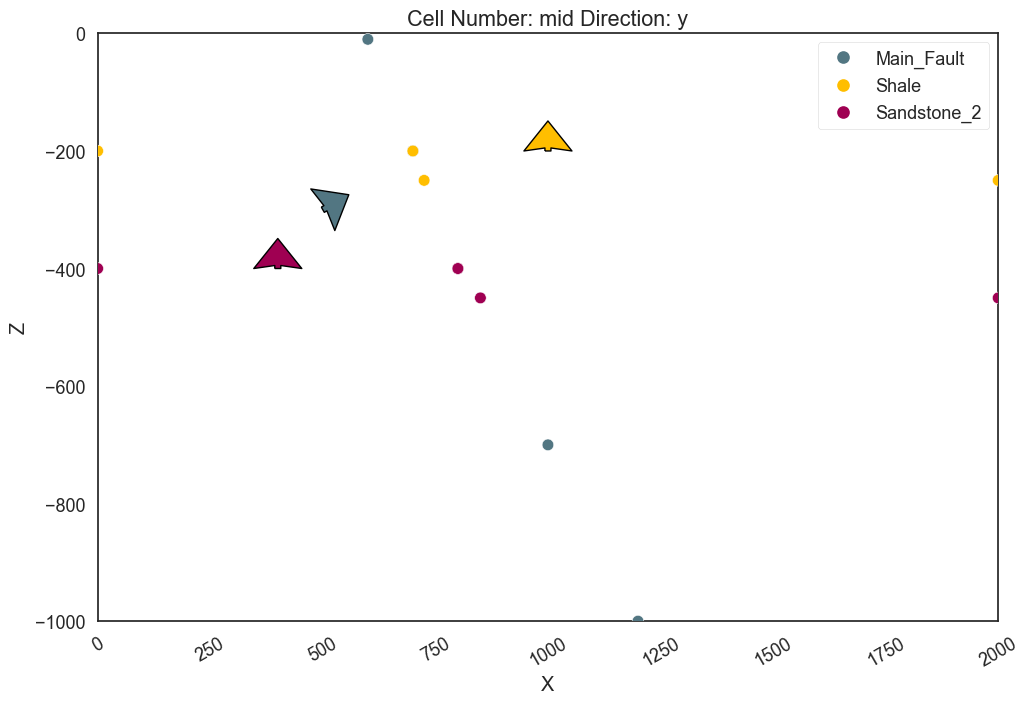

In [ ]:
plot= gpv.plot_2d(geo_model, show_lith=True, show_boundaries=False)

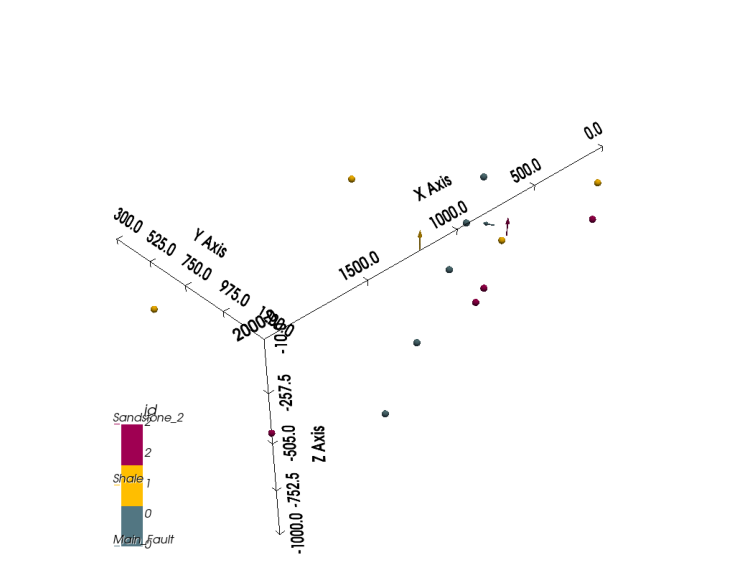

In [ ]:
gpv.plot_3d(geo_model, image=True, plotter_type='basic')

In [ ]:
geo_model.interpolation_options

InterpolationOptions(kernel_options={'range': 5, 'c_o': 10, 'uni_degree': 1, 'i_res': 4, 'gi_res': 2, 'number_dimensions': 3, 'kernel_function': <AvailableKernelFunctions.cubic: KernelFunction(base_function=<function cubic_function at 0x000001762D315630>, derivative_div_r=<function cubic_function_p_div_r at 0x000001762D315A20>, second_derivative=<function cubic_function_a at 0x000001762D315AB0>, consume_sq_distance=False)>, 'compute_condition_number': False, 'kernel_solver': <Solvers.DEFAULT: 1>}, number_octree_levels=1, current_octree_level=0, compute_scalar_gradient=False, dual_contouring=True, dual_contouring_masking_options=DualContouringMaskingOptions.INTERSECT, dual_contouring_fancy=True, debug=True, debug_water_tight=False, _number_octree_levels_surface=4)

In [ ]:
sol = gp.compute_model(geo_model)
sol

Setting Backend To: AvailableBackends.numpy


C:\Users\silva\anaconda3\envs\gempy\lib\site-packages\gempy_engine\API\dual_contouring\multi_scalar_dual_contouring.py:47: UserWarning: Fancy triangulation only works with regular grid of resolution [2,2,2]. Defaulting to regular triangulation
  warnings.warn("Fancy triangulation only works with regular grid of resolution [2,2,2]. Defaulting to regular triangulation")


Solutions(1 Octree Levels, 3 DualContouringMeshes)

In [ ]:
geo_model.solutions

Solutions(1 Octree Levels, 3 DualContouringMeshes)

C:\Users\silva\anaconda3\envs\gempy\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:170: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


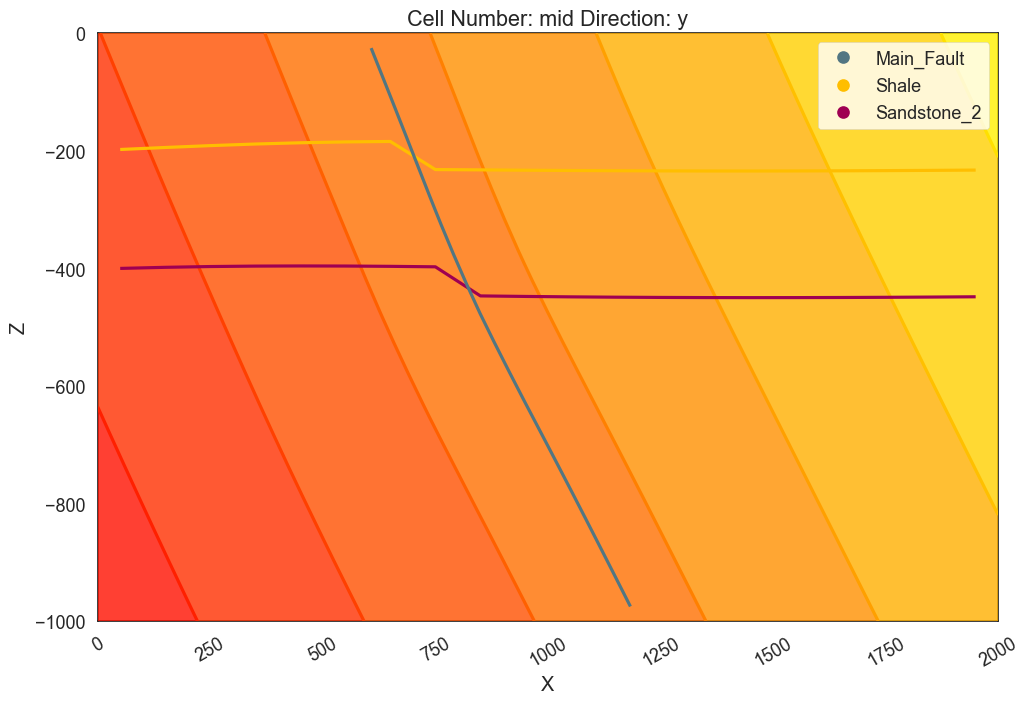

In [ ]:
gpv.plot_2d(geo_model, show_data=False, show_scalar=True, show_lith=False)
plt.show()

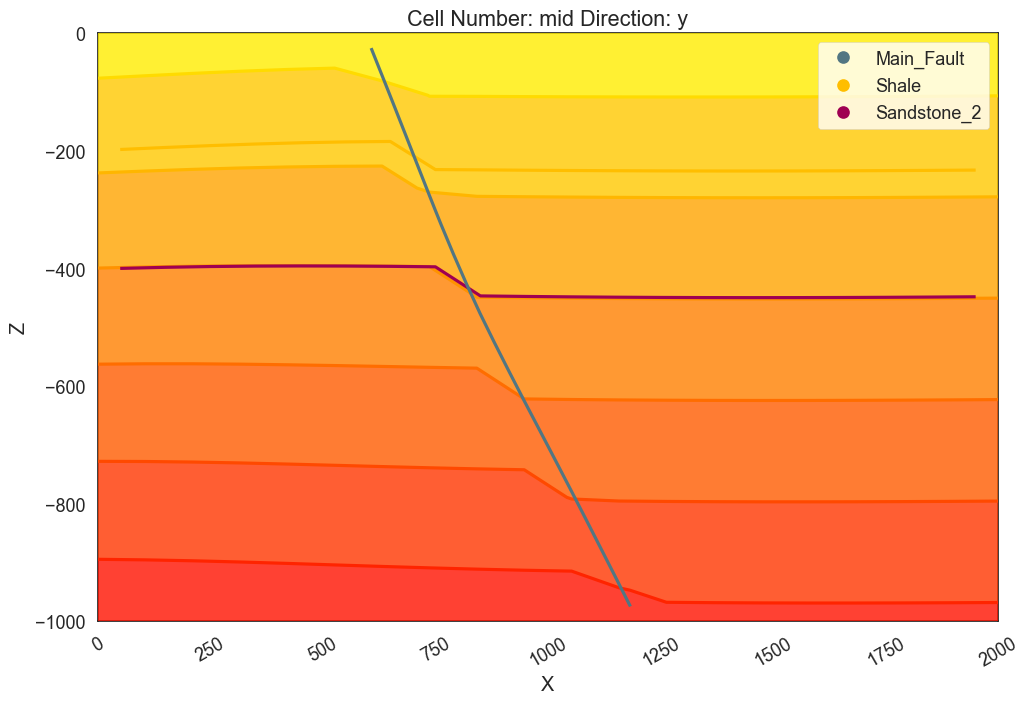

In [ ]:
gpv.plot_2d(geo_model, series_n=1, show_data=False, show_scalar=True, show_lith=False)
plt.show()

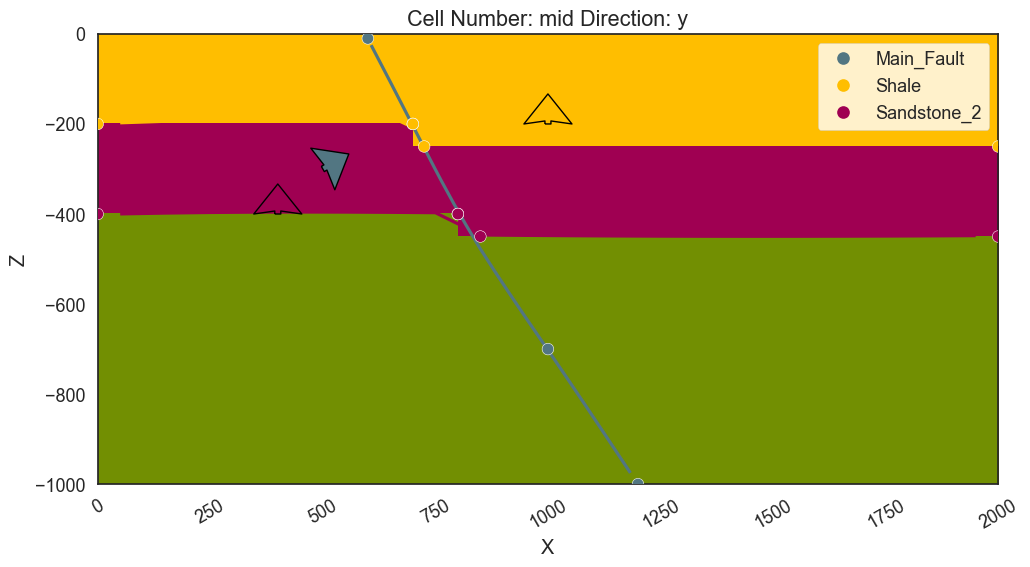

In [ ]:
gpv.plot_2d(geo_model, show_data=True, cell_number="mid", direction= 'y')

In [ ]:
gpv.plot_3d(geo_model, show_data=False, image=False, plotter_type='basic')